<a href="https://colab.research.google.com/github/abhi147p/Abhishek_INFO5731_Spring2023/blob/main/In_class_exercise_05_04182023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fifth in-class-exercise (40 points in total, 4/18/2023)**

(20 points) The purpose of the question is to practice different machine learning algorithms for text classification as well as the performance evaluation. In addition, you are requried to conduct *10 fold cross validation (https://scikit-learn.org/stable/modules/cross_validation.html)* in the training. 

The dataset can be download from canvas. The dataset contains two files train data and test data for sentiment analysis in IMDB review, it has two categories: 1 represents positive and 0 represents negative. You need to split the training data into training and validate data (80% for training and 20% for validation, https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6) and perform 10 fold cross validation while training the classifier. The final trained model was final evaluated on the test data. 

Algorithms:

(1) MultinominalNB

(2) SVM 

(3) KNN 

(4) Decision tree

(5) Random Forest

(6) XGBoost

(7) Word2Vec

(8) BERT

Evaluation measurement:

(1) Accuracy

(2) Recall

(3) Precison 

(4) F-1 score

In [1]:
# Write your code here

# Write your code here

import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:

%cd drive/MyDrive

/content/drive/MyDrive


In [4]:
%ls

'After cleaning data.csv'         classification_train.csv   stsa-test.txt
 Amazon_Unlocked_Mobile.csv      'Colab Notebooks'/          stsa-train.txt
 Assignment1_denton_housing.csv   regression_test.csv
 classification_test.csv          regression_train.csv


In [5]:
def get_text_data(file_name):
  with open(file_name) as txtf:
      mylist = [line.strip('\n') for line in txtf]
      
  labels = []
  text = []

  for i, line in enumerate(mylist):
      label = mylist[i][0]
      tex = mylist[i][1:]
      labels.append(label)
      text.append(tex)
  return labels, text

train_data = get_text_data("stsa-train.txt")
train_df = pd.DataFrame(list(zip(train_data[0], train_data[1])),columns =['Reviews', 'Text'])
train_df.head()

,Reviews,Text
0,1,"a stirring , funny and finally transporting r..."
1,0,apparently reassembled from the cutting-room ...
2,0,they presume their audience wo n't sit still ...
3,1,this is a visually stunning rumination on lov...
4,1,jonathan parker 's bartleby should have been ...


Training data processing

In [6]:
# Write your code here
import nltk, re, string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import Word
nltk.download('stopwords')
nltk.download("wordnet")
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

def tokenize_sentence(s):
  # reviews = []
  # for x in s:
  #   reviews.append(nltk.word_tokenize(x))
  st = PorterStemmer()
  lemmatizer = WordNetLemmatizer()
  tokenizer = RegexpTokenizer(r'\w+')
  tokens = tokenizer.tokenize(s) 
  stem_words=[st.stem(w) for w in tokens]
  lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
  return " ".join(tokens) 

def remove_puntutation_and_special_chars(s):
  """
    params1: string containing sentence
    return: string with no punctuations
  """
  # punctuation = """!()-[]{};+|=-_~`:'"\,<>./?@#$%^&*_~"""
  # s1 = s1.replace(punctuation, "")
  s = s.replace('{html}',"") 
  s = re.sub(r'http\S+', '',s)
  cleanr = re.compile('<.*?>')
  cleantext = re.sub(cleanr, '', s)
  # return cleantext
  return "".join([x for x in cleantext if x not in string.punctuation])

def remove_nums(s):
  return re.sub(r'[0-9]+', '', s)

def remove_stopwords(s):
  stop = stopwords.words("english")
  return " ".join(x for x in s.split() if len(x)>2 if x not in stop)

def lower_all(s):
  return " ".join(x.lower() for x in s.split())

train_df["text_modified"] = train_df["Text"].replace("\n","")
operations = [remove_puntutation_and_special_chars, remove_nums, lower_all, remove_stopwords]
for op in operations:
  train_df["text_modified"] = train_df["text_modified"].apply(op)
print(train_df.shape)
train_df.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


(6920, 3)


,Reviews,Text,text_modified
0,1,"a stirring , funny and finally transporting r...",stirring funny finally transporting reimaginin...
1,0,apparently reassembled from the cutting-room ...,apparently reassembled cuttingroom floor given...
2,0,they presume their audience wo n't sit still ...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on lov...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been ...,jonathan parker bartleby beallendall modernoff...


In [7]:
train_df['tls'] = train_df['text_modified'].apply(tokenize_sentence) # tls: text_modified lemmatize stemming
train_df.head()

,Reviews,Text,text_modified,tls
0,1,"a stirring , funny and finally transporting r...",stirring funny finally transporting reimaginin...,stirring funny finally transporting reimaginin...
1,0,apparently reassembled from the cutting-room ...,apparently reassembled cuttingroom floor given...,apparently reassembled cuttingroom floor given...
2,0,they presume their audience wo n't sit still ...,presume audience sit still sociology lesson ho...,presume audience sit still sociology lesson ho...
3,1,this is a visually stunning rumination on lov...,visually stunning rumination love memory histo...,visually stunning rumination love memory histo...
4,1,jonathan parker 's bartleby should have been ...,jonathan parker bartleby beallendall modernoff...,jonathan parker bartleby beallendall modernoff...


Testing data preprocessing

In [8]:
test_data = get_text_data("stsa-test.txt")
test_df = pd.DataFrame(list(zip(test_data[0], test_data[1])),columns =['Reviews', 'Text'])
test_df.head()

,Reviews,Text
0,0,"no movement , no yuks , not much of anything ."
1,0,"a gob of drivel so sickly sweet , even the ea..."
2,0,"gangs of new york is an unapologetic mess , w..."
3,0,we never really feel involved with the story ...
4,1,this is one of polanski 's best films .


In [9]:
test_df["text_modified"] = test_df["Text"].replace("\n","")
operations = [remove_puntutation_and_special_chars, remove_nums, lower_all, remove_stopwords]
for op in operations:
  test_df["text_modified"] = test_df["text_modified"].apply(op)
print(test_df.shape)
test_df.head()

(1821, 3)


,Reviews,Text,text_modified
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films


In [10]:
test_df['tls'] = test_df['text_modified'].apply(tokenize_sentence) # tls: text_modified lemmatize stemming
test_df.head()

,Reviews,Text,text_modified,tls
0,0,"no movement , no yuks , not much of anything .",movement yuks much anything,movement yuks much anything
1,0,"a gob of drivel so sickly sweet , even the ea...",gob drivel sickly sweet even eager consumers m...,gob drivel sickly sweet even eager consumers m...
2,0,"gangs of new york is an unapologetic mess , w...",gangs new york unapologetic mess whose saving ...,gangs new york unapologetic mess whose saving ...
3,0,we never really feel involved with the story ...,never really feel involved story ideas remain ...,never really feel involved story ideas remain ...
4,1,this is one of polanski 's best films .,one polanski best films,one polanski best films


TF-IDF Vectorization

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vectorizer = TfidfVectorizer(lowercase = False, analyzer='word')
train_tfidf = tfidf_vectorizer.fit_transform(train_df["tls"]).toarray()
test_tfidf = tfidf_vectorizer.transform(test_df["tls"]).toarray()

In [12]:
x_valid, y_valid = test_tfidf, test_df['Reviews']

Splitting the data into train and test

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_tfidf, train_df["Reviews"],test_size = 0.2, random_state = 202)

In [14]:
y_test_dup = y_test.astype(int)
y_test_dup.dtype

dtype('int64')

Implemeting train and test the models

In [102]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# classification report
from sklearn.metrics import classification_report

def train_model(model, x_train, y_train, x_test, model_name):
  classifier = model
  model = classifier.fit(x_train, y_train)
  predictions_validation_set = classifier.predict(x_test)

  print(f"Accuracy of the {model_name} on train: {round(accuracy_score(y_test, predictions_validation_set)*100)}%")
  print(f"Percision of the {model_name} on train: { round(precision_score(y_test, predictions_validation_set, pos_label='0')*100)}%")
  print(f"Recall of the {model_name} on train: {round(recall_score(y_test, predictions_validation_set, pos_label='0')*100)}%")
  print(f"F1 Score of the {model_name} on train: { round(f1_score(y_test, predictions_validation_set, pos_label='0')*100)}%")
  
  cr_naive_validation = classification_report(y_test, predictions_validation_set)
  print("Classification Report on train: ", "\n", "\n",cr_naive_validation)

  return model

In [103]:
def test_model(model, x_valid, y_valid, model_name):
  predictions_test_set = model.predict(x_valid) 

  print(f"Accuracy of the {model_name} on test: {round(accuracy_score(y_valid, predictions_test_set)*100)}%")
  print(f"Percision of the {model_name} on test: { round(precision_score(y_valid, predictions_test_set, pos_label='0')*100)}%")
  print(f"Recall of the {model_name} on test: {round(recall_score(y_valid, predictions_test_set, pos_label='0')*100)}%")
  print(f"F1 Score of the {model_name} on test: { round(f1_score(y_valid, predictions_test_set, pos_label='0')*100)}%")

  cr_naive_test = classification_report(y_valid, predictions_test_set)
  print("Classification Report on test: ", "\n", "\n",cr_naive_test)

Algorithms

1. Multinomial

In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
model_nb = train_model(MultinomialNB(), x_train, y_train, x_test, "Naive Bayes Model")

Accuracy of the Naive Bayes Model on train: 79%
Percision of the Naive Bayes Model on train: 83%
Recall of the Naive Bayes Model on train: 70%
F1 Score of the Naive Bayes Model on train: 76%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.83      0.70      0.76       667
           1       0.76      0.87      0.81       717

    accuracy                           0.79      1384
   macro avg       0.80      0.79      0.79      1384
weighted avg       0.79      0.79      0.79      1384



In [ ]:
# K fold cross validation
from sklearn.model_selection import cross_val_score
naive_accuracies_validation = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)

print(f"Naive Bayes Model  10-fold cross validation on train:  {round(naive_accuracies_validation.mean()*100)}%")

Naive Bayes Model  10-fold cross validation on train:  77%


In [ ]:
test_model(model_nb, x_valid, y_valid, "Naive Bayes Model")

Accuracy of the Naive Bayes Model on test: 79%
Percision of the Naive Bayes Model on test: 85%
Recall of the Naive Bayes Model on test: 71%
F1 Score of the Naive Bayes Model on test: 77%
Classification Report on test:  
 
               precision    recall  f1-score   support

           0       0.85      0.71      0.77       912
           1       0.75      0.87      0.81       909

    accuracy                           0.79      1821
   macro avg       0.80      0.79      0.79      1821
weighted avg       0.80      0.79      0.79      1821



In [ ]:
naive_accuracies_test = cross_val_score(estimator = classifier, X = x_valid, y = y_valid, cv = 10)
print(f"Naive Bayes Model 10-fold cross validation score on testing set is :  {round(naive_accuracies_test.mean()*100)}%")

Naive Bayes Model 10-fold cross validation score on testing set is :  73%


2. SVM

In [ ]:
from sklearn import svm

classifier_svm = svm.LinearSVC()
model_svm = train_model(classifier_svm, x_train, y_train, x_test, "SVM model")

Accuracy of the SVM model on train: 78%
Percision of the SVM model on train: 77%
Recall of the SVM model on train: 77%
F1 Score of the SVM model on train: 77%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.77      0.77      0.77       667
           1       0.79      0.79      0.79       717

    accuracy                           0.78      1384
   macro avg       0.78      0.78      0.78      1384
weighted avg       0.78      0.78      0.78      1384



In [ ]:
# K fold cross validation
svm_accuracies_validation = cross_val_score(estimator = classifier_svm, X = x_train, y = y_train, cv = 10)

print(f"SVM Model  10-fold cross validation on train:  {round(svm_accuracies_validation.mean()*100)}%")

SVM Model  10-fold cross validation on train:  76%


In [ ]:
test_model(model_svm, x_valid, y_valid, "SVM Model")

Accuracy of the SVM Model on test: 79%
Percision of the SVM Model on test: 80%
Recall of the SVM Model on test: 77%
F1 Score of the SVM Model on test: 78%
Classification Report on test:  
 
               precision    recall  f1-score   support

           0       0.80      0.77      0.78       912
           1       0.77      0.81      0.79       909

    accuracy                           0.79      1821
   macro avg       0.79      0.79      0.79      1821
weighted avg       0.79      0.79      0.79      1821



In [ ]:
svm_accuracies_test = cross_val_score(estimator = classifier_svm, X = x_valid, y = y_valid, cv = 10)
print(f"SVM Model 10-fold cross validation score on testing set is :  {round(svm_accuracies_test.mean()*100)}%")

SVM Model 10-fold cross validation score on testing set is :  71%


3. KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

classifier_knn = KNeighborsClassifier(n_neighbors = 15)
model_knn = train_model(classifier_knn, x_train, y_train, x_test, "KNN model")

Accuracy of the KNN model on train: 74%
Percision of the KNN model on train: 71%
Recall of the KNN model on train: 79%
F1 Score of the KNN model on train: 75%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.71      0.79      0.75       667
           1       0.78      0.70      0.74       717

    accuracy                           0.74      1384
   macro avg       0.75      0.75      0.74      1384
weighted avg       0.75      0.74      0.74      1384



In [ ]:
knn_accuracies_validation = cross_val_score(estimator = classifier_knn, X = x_train, y = y_train, cv = 10)

print(f"KNN Model  10-fold cross validation score on training set is :  {round(knn_accuracies_validation.mean()*100)}%")

KNN Model  10-fold cross validation score on training set is :  71%


In [ ]:
test_model(model_knn, x_valid, y_valid, "KNN Model")

Accuracy of the KNN Model on test: 73%
Percision of the KNN Model on test: 72%
Recall of the KNN Model on test: 77%
F1 Score of the KNN Model on test: 74%
Classification Report on test:  
 
               precision    recall  f1-score   support

           0       0.72      0.77      0.74       912
           1       0.75      0.70      0.72       909

    accuracy                           0.73      1821
   macro avg       0.74      0.73      0.73      1821
weighted avg       0.74      0.73      0.73      1821



In [ ]:
knn_accuracies_test = cross_val_score(estimator = classifier_knn, X = x_valid, y = y_valid, cv = 10)

print(f"KNN Model 10-fold cross validation score on testing set is :  {round(knn_accuracies_test.mean()*100)}%")

KNN Model 10-fold cross validation score on testing set is :  60%


4. Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

classifier_dt = DecisionTreeClassifier()
model_dt = train_model(classifier_dt, x_train, y_train, x_test, "Decision Tree model") 

Accuracy of the Decision Tree model on train: 66%
Percision of the Decision Tree model on train: 63%
Recall of the Decision Tree model on train: 71%
F1 Score of the Decision Tree model on train: 67%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.63      0.71      0.67       667
           1       0.70      0.62      0.66       717

    accuracy                           0.66      1384
   macro avg       0.67      0.66      0.66      1384
weighted avg       0.67      0.66      0.66      1384



In [ ]:
dt_accuracies_validation = cross_val_score(estimator = classifier_dt, X = x_train, y = y_train, cv = 10)

print(f"Decison Tree Classifier Model  10-fold cross validation score on training set is :  {round(dt_accuracies_validation.mean()*100)}%")

Decison Tree Classifier Model  10-fold cross validation score on training set is :  66%


In [ ]:
test_model(model_dt, x_valid, y_valid, "Decision Tree Model")

Accuracy of the Decision Tree Model on test: 67%
Percision of the Decision Tree Model on test: 66%
Recall of the Decision Tree Model on test: 71%
F1 Score of the Decision Tree Model on test: 68%
Classification Report on test:  
 
               precision    recall  f1-score   support

           0       0.66      0.71      0.68       912
           1       0.68      0.63      0.65       909

    accuracy                           0.67      1821
   macro avg       0.67      0.67      0.67      1821
weighted avg       0.67      0.67      0.67      1821



In [ ]:
dt_accuracies_test = cross_val_score(estimator = classifier_dt, X = x_valid, y = y_valid, cv = 10)

print(f"Decison Tree Classifier Model 10-fold cross validation score on testing set is :  {round(dt_accuracies_test.mean()*100)}%")

Decison Tree Classifier Model 10-fold cross validation score on testing set is :  62%


5. Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier()
model_rf = train_model(classifier_rf, x_train, y_train, x_test, "Random Forest model")

Accuracy of the Random Forest model on train: 72%
Percision of the Random Forest model on train: 70%
Recall of the Random Forest model on train: 75%
F1 Score of the Random Forest model on train: 72%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.70      0.75      0.72       667
           1       0.75      0.69      0.72       717

    accuracy                           0.72      1384
   macro avg       0.72      0.72      0.72      1384
weighted avg       0.72      0.72      0.72      1384



In [ ]:
rf_accuracies_validation = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)

print(f"Decison Random Forest Model  10-fold cross validation score on training set is :  {round(rf_accuracies_validation.mean()*100)}%")

Decison Random Forest Model  10-fold cross validation score on training set is :  72%


In [ ]:
test_model(model_rf, x_valid, y_valid, "Random Forest Model")

Accuracy of the Random Forest Model on test: 74%
Percision of the Random Forest Model on test: 73%
Recall of the Random Forest Model on test: 76%
F1 Score of the Random Forest Model on test: 75%
Classification Report on test:  
 
               precision    recall  f1-score   support

           0       0.73      0.76      0.75       912
           1       0.75      0.72      0.73       909

    accuracy                           0.74      1821
   macro avg       0.74      0.74      0.74      1821
weighted avg       0.74      0.74      0.74      1821



In [ ]:
rf_accuracies_test = cross_val_score(estimator = classifier_rf, X = x_valid, y = y_valid, cv = 10)

print(f"Random Forest Classifier Model 10-fold cross validation score on testing set is :  {round(rf_accuracies_test.mean()*100)}%")

Random Forest Classifier Model 10-fold cross validation score on testing set is :  64%


6. XG Boost

In [100]:
y_train_dup = y_train.astype(int)
y_train_dup.dtype

dtype('int64')

In [104]:
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
# model_xgb = train_model(classifier_xgb, x_train, y_train_dup, x_test, "XG Boost model")

model_xgb = classifier_xgb.fit(x_train, y_train_dup)
predictions_validation_set = model_xgb.predict(x_test)

print(f"Accuracy of the XG Boost model on train: {round(accuracy_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"Percision of the XG Boost model on train: { round(precision_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"Recall of the XG Boost model on train: {round(recall_score(y_test_dup, predictions_validation_set)*100)}%")
print(f"F1 Score of the XG Boost model on train: { round(f1_score(y_test_dup, predictions_validation_set)*100)}%")

cr_naive_validation = classification_report(y_test_dup, predictions_validation_set)
print("Classification Report on train: ", "\n", "\n",cr_naive_validation)

Accuracy of the XG Boost model on train: 68%
Percision of the XG Boost model on train: 66%
Recall of the XG Boost model on train: 79%
F1 Score of the XG Boost model on train: 72%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.71      0.57      0.63       667
           1       0.66      0.79      0.72       717

    accuracy                           0.68      1384
   macro avg       0.69      0.68      0.68      1384
weighted avg       0.69      0.68      0.68      1384



In [108]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier

classifier_xgb = XGBClassifier()
xgb_accuracies_validation = cross_val_score(estimator = classifier_xgb, X = x_train, y = y_train_dup, cv = 10)

print(f"XGBoost Model  10-fold cross validation score on training set is :  {round(xgb_accuracies_validation.mean()*100)}%")

XGBoost Model  10-fold cross validation score on training set is :  69%


In [106]:
y_valid_dup = y_valid.astype(int)
y_valid_dup.dtype

dtype('int64')

In [107]:
# test_model(model_xgb, x_valid, y_valid, "XG Boost Model")
predictions_test_set = model_xgb.predict(x_valid)

print(f"Accuracy of the XG Boost model on train: {round(accuracy_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"Percision of the XG Boost model on train: { round(precision_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"Recall of the XG Boost model on train: {round(recall_score(y_valid_dup, predictions_test_set)*100)}%")
print(f"F1 Score of the XG Boost model on train: { round(f1_score(y_valid_dup, predictions_test_set)*100)}%")

cr_naive_validation = classification_report(y_valid_dup, predictions_test_set)
print("Classification Report on train: ", "\n", "\n",cr_naive_validation)

Accuracy of the XG Boost model on train: 69%
Percision of the XG Boost model on train: 66%
Recall of the XG Boost model on train: 79%
F1 Score of the XG Boost model on train: 72%
Classification Report on train:  
 
               precision    recall  f1-score   support

           0       0.74      0.59      0.66       912
           1       0.66      0.79      0.72       909

    accuracy                           0.69      1821
   macro avg       0.70      0.69      0.69      1821
weighted avg       0.70      0.69      0.69      1821



In [109]:
xgb_accuracies_test = cross_val_score(estimator = classifier_xgb, X = x_valid, y = y_valid_dup, cv = 10)

print(f"XGBoost Classifier Model 10-fold cross validation score on testing set is :  {round(xgb_accuracies_test.mean()*100)}%")

XGBoost Classifier Model 10-fold cross validation score on testing set is :  66%


7. Word2Vec

In [19]:
i=0
list_of_sent_train, list_of_sent_test=[],[]
for sent in train_df['tls'].values:
    list_of_sent_train.append(sent.split())
for sent in test_df['tls'].values:
  list_of_sent_test.append(sent.split())

import gensim
# Training the wor2vec model using train dataset
w2v_model_train=gensim.models.Word2Vec(list_of_sent_train,vector_size=100, workers=4)
w2v_model_test=gensim.models.Word2Vec(list_of_sent_test,vector_size=100, workers=4)

In [20]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_train: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model_train.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors_train = np.array(sent_vectors)
sent_vectors_train = np.nan_to_num(sent_vectors)
sent_vectors_train.shape

(6920, 100)

In [21]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent_test: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model_test.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors_test = np.array(sent_vectors)
sent_vectors_test = np.nan_to_num(sent_vectors)
sent_vectors_test.shape

(1821, 100)

In [15]:
import numpy as np
import pandas as pd
import gensim.downloader as api
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

# Load the pre-trained word2vec model
model = api.load('word2vec-google-news-300')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(sent_vectors_train, sent_vectors_train, test_size=0.2, random_state=42)


# logistic with w2v
clf = LogisticRegression()
clf.fit(X_train, y_train)

predictions_validation_set = clf.predict(x_test)

print(f"Accuracy of the W2V model on train: {round(accuracy_score(y_test, predictions_validation_set)*100)}%")
print(f"Percision of the W2V model on train: { round(precision_score(y_test, predictions_validation_set)*100)}%")
print(f"Recall of the W2V model on train: {round(recall_score(y_test, predictions_validation_set)*100)}%")
print(f"F1 Score of the W2V model on train: { round(f1_score(y_test, predictions_validation_set)*100)}%")

cr_naive_validation = classification_report(y_test, predictions_validation_set)
print("Classification Report on train: ", "\n", "\n",cr_naive_validation)

[==================================================] 100.0% 1662.8/1662.8MB downloaded


AttributeError: ignored

In [ ]:
w2v_accuracies_validation = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 10)

print(f"Word2Vec Model  10-fold cross validation score on training set is :  {round(w2v_accuracies_validation.mean()*100)}%")

In [ ]:
# test_model(model_xgb, x_valid, y_valid, "XG Boost Model")
predictions_test_set = clf.predict(x_valid)

print(f"Accuracy of the W2V model on train: {round(accuracy_score(y_valid, predictions_test_set)*100)}%")
print(f"Percision of the W2V model on train: { round(precision_score(y_valid, predictions_test_set)*100)}%")
print(f"Recall of the W2V model on train: {round(recall_score(y_valid, predictions_test_set)*100)}%")
print(f"F1 Score of the W2V model on train: { round(f1_score(y_valid, predictions_test_set)*100)}%")

cr_naive_validation = classification_report(y_valid, predictions_test_set)
print("Classification Report on train: ", "\n", "\n",cr_naive_validation)

In [ ]:
w2v_accuracies_validation = cross_val_score(estimator = clf, X = x_valid, y = y_valid, cv = 10)

print(f"Word2Vec Model  10-fold cross validation score on testing set is :  {round(w2v_accuracies_validation.mean()*100)}%")

8. BERT

(20 points) The purpose of the question is to practice different machine learning algorithms for text clustering
Please downlad the dataset by using the following link.  https://www.kaggle.com/PromptCloudHQ/amazon-reviews-unlocked-mobile-phones
(You can also use different text data which you want)

Apply the listed clustering methods to the dataset:

K-means

DBSCAN

Hierarchical clustering

Word2Vec

BERT

You can refer to of the codes from  the follwing link below. 
https://www.kaggle.com/karthik3890/text-clustering 

In [30]:
#Write your code here.
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/abhi147p/Abhishek_INFO5731_Spring2023/main/Assignment_3_sentiment.csv')
df.dropna(inplace=True)
df["text_modified"] = df["clean_text"].replace("\n","")
operations = [remove_puntutation_and_special_chars, remove_nums, lower_all, remove_stopwords]
for op in operations:
  df["text_modified"] = df["text_modified"].apply(op)
print(df.shape)
df.head()

(105, 4)


,document_id,clean_text,Sentiment,text_modified
0,0,entire movie looked like video game art budoka...,Neutral,entire movie looked like video game art budoka...
1,1,im dragon ball fan time ive watched back child...,Neutral,dragon ball fan time ive watched back childhoo...
2,2,ive seen movie cinema laugh much like humor mo...,Positive,ive seen movie cinema laugh much like humor mo...
3,3,honest first really concerned cgianimation sin...,Positive,honest first really concerned cgianimation sin...
4,4,dragon ball fan india delight watch theatre ma...,Positive,dragon ball fan india delight watch theatre ma...


In [31]:
df['review_tls'] = df['text_modified'].apply(tokenize_sentence) # tls: text_modified lemmatize stemming
df.head()

,document_id,clean_text,Sentiment,text_modified,review_tls
0,0,entire movie looked like video game art budoka...,Neutral,entire movie looked like video game art budoka...,entire movie looked like video game art budoka...
1,1,im dragon ball fan time ive watched back child...,Neutral,dragon ball fan time ive watched back childhoo...,dragon ball fan time ive watched back childhoo...
2,2,ive seen movie cinema laugh much like humor mo...,Positive,ive seen movie cinema laugh much like humor mo...,ive seen movie cinema laugh much like humor mo...
3,3,honest first really concerned cgianimation sin...,Positive,honest first really concerned cgianimation sin...,honest first really concerned cgianimation sin...
4,4,dragon ball fan india delight watch theatre ma...,Positive,dragon ball fan india delight watch theatre ma...,dragon ball fan india delight watch theatre ma...


In [32]:
# TF-IDF VECTORIZATION
from sklearn.feature_extraction.text import TfidfVectorizer 

tfidf_vect = TfidfVectorizer()
tfidf_vects = tfidf_vect.fit_transform(df['review_tls'].values.astype('U'))

In [33]:
names= tfidf_vect.get_feature_names_out()

1. KMeans

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0, 0.5, 'Inertia')

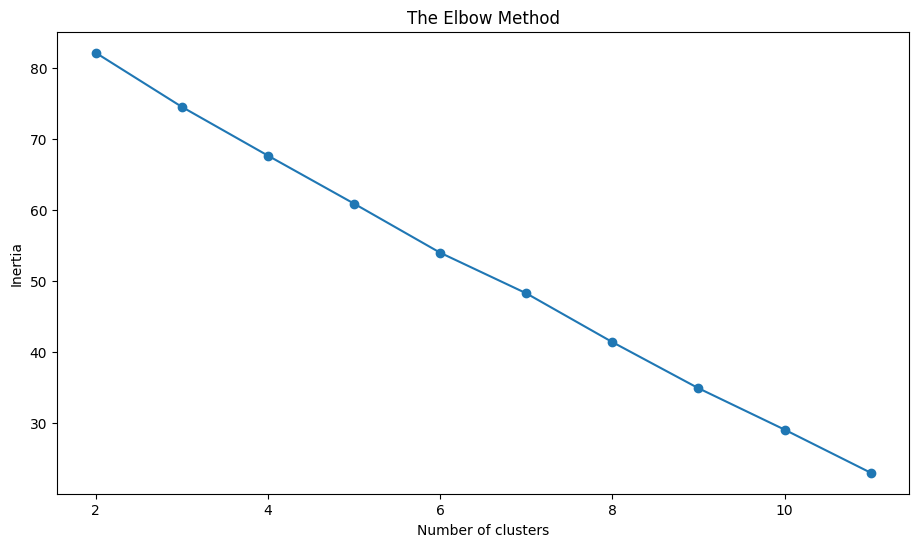

In [34]:
## ELBOW METHOD
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
scores = []
for i in range(2,12):
    kmeans = KMeans(n_clusters = i, init = "k-means++", random_state = 40)
    kmeans.fit(tfidf_vects)
    scores.append(kmeans.inertia_)

plt.figure(figsize = (11,6))
plt.plot(range(2,12), scores, marker = "o")
plt.title ("The Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")

In [35]:
#forming 6 clusters
from sklearn.cluster import KMeans
model = KMeans(n_clusters = 6,init='k-means++',max_iter=10000, random_state=50)
model.fit(tfidf_vects)
# from collections import Counter
# Counter(model.labels_)
cls_df = pd.DataFrame([model.labels_])
cls_df.value_counts()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99  100  101  102  103  104
4  1  0  0  1  4  5  0  3  2  5   4   4   1   5   4   1   0   0   1   4   5   0   3   2   5   4   4   1   5   4   1   0   0   1   4   5   0   3   2   5   4   4   1   5   4   1   0   0   1   4   5   0   3   2   5   4   4   1   5   4   1   0   0   1   4   5   0   3   2   5   4   4   1   5   4   1   0   0   1   4   5   0   3   2   5   4   4   1   5   4   1   0   0   1   4   5   0   3   2   5    4    4    1    5      1
dtype: int64

In [36]:
# Clusters containing words with maximum strength
top_words = 7
centroids = model.cluster_centers_.argsort()[:, ::-1]
for cluster_num in range(6):
    key_features = [names[i] for i in centroids[cluster_num, :top_words]]
    print('Cluster '+str(cluster_num+1))
    print('Top Words:', key_features)

Cluster 1
Top Words: ['movie', 'really', 'great', 'think', 'end', 'character', 'well']
Cluster 2
Top Words: ['watch', 'ball', 'dragon', 'theatre', 'time', 'movie', 'series']
Cluster 3
Top Words: ['dbzs', 'youre', 'take', 'top', 'fan', 'great', 'namesakethe']
Cluster 4
Top Words: ['kakaroto', 'worled', 'anime', 'best', 'goku', 'worledkakaroto', 'finally']
Cluster 5
Top Words: ['cell', 'original', 'took', 'creation', 'even', 'worse', 'like']
Cluster 6
Top Words: ['film', 'ball', 'dragon', 'see', 'fan', 'franchise', 'able']


In [37]:
cluster_center = model.cluster_centers_
cluster_center

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.04389547],
       [0.        , 0.        , 0.        , ..., 0.        , 0.24241196,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.01949122, 0.09032066, 0.03414773, ..., 0.03414773, 0.        ,
        0.        ]])

In [38]:
from sklearn import metrics
silhouette_score_tf = metrics.silhouette_score(tfidf_vects, model.labels_, metric='euclidean')
silhouette_score_tf

0.3779515114307547

2. DBSCAN

In [39]:
reviews=[]
for i in df['review_tls']:
    reviews.append(str(i).split())
import gensim
w2v_model=gensim.models.Word2Vec(reviews, vector_size=100, workers=4)

import numpy as np
vectors = []
for i in reviews:
    vector = np.zeros(100)
    count = 0
    for word in i:
        try:
            vec = w2v_model.wv[word]
            vector += vec
            count += 1
        except:
            pass
    vector /= count
    vectors.append(vector)  
vectors = np.array(vectors)
vectors = np.nan_to_num(vectors)

In [44]:
from sklearn.cluster import DBSCAN
minPts = 2 * 100
# Lower bound function
def lower_bound(nums, target): 
    l, r = 0, len(nums) - 1
    # Binary searching
    while l <= r:
        mid = int(l + (r - l) / 2)
        if nums[mid] >= target:
            r = mid - 1
        else:
            l = mid + 1
    return l

def compute200thnearestneighbour(x, data): 
    dists = []
    for val in data:
      # computing distances
        dist = np.sum((x - val) **2 ) 
        if(len(dists) == 200 and dists[199] > dist): 
            l = int(lower_bound(dists, dist)) 
            if l < 200 and l >= 0 and dists[l] > dist:
                dists[l] = dist
        else:
            dists.append(dist)
            dists.sort()

# Dist 199 contains the distance of 200th nearest neighbour. 
    print(len(dists))   
    return dists[104]

vectors.shape

(105, 100)

In [45]:
# Computing the 200th nearest neighbour distance of some point the dataset:
twohundrethneigh = []
for val in vectors[:1000]:
    twohundrethneigh.append( compute200thnearestneighbour(val, vectors[:1000]) )
twohundrethneigh.sort()

105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105
105


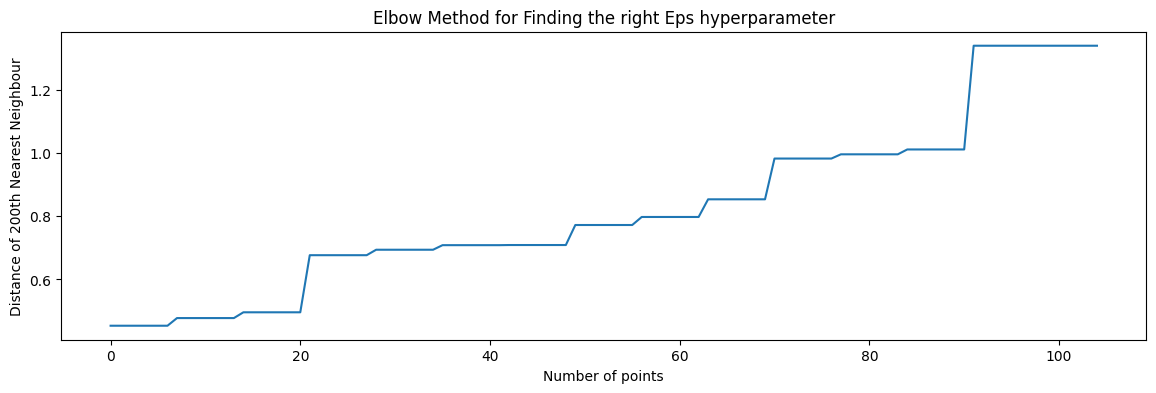

In [46]:
# Plotting for the Elbow Method :
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(14,4))
plt.title("Elbow Method for Finding the right Eps hyperparameter")
plt.plot([x for x in range(len(twohundrethneigh))], twohundrethneigh)
plt.xlabel("Number of points")
plt.ylabel("Distance of 200th Nearest Neighbour")
plt.show()

In [47]:
# Create the model
model_dbs = DBSCAN(eps = 5, min_samples = minPts)
model_dbs.fit(vectors)

DBSCAN(eps=5, min_samples=200)

In [48]:
df_dbs = df
df_dbs["DBS Cluster Label"] = model_dbs.labels_
df_dbs

,document_id,clean_text,Sentiment,text_modified,review_tls,DBS Cluster Label
0,0,entire movie looked like video game art budoka...,Neutral,entire movie looked like video game art budoka...,entire movie looked like video game art budoka...,-1
1,1,im dragon ball fan time ive watched back child...,Neutral,dragon ball fan time ive watched back childhoo...,dragon ball fan time ive watched back childhoo...,-1
2,2,ive seen movie cinema laugh much like humor mo...,Positive,ive seen movie cinema laugh much like humor mo...,ive seen movie cinema laugh much like humor mo...,-1
3,3,honest first really concerned cgianimation sin...,Positive,honest first really concerned cgianimation sin...,honest first really concerned cgianimation sin...,-1
4,4,dragon ball fan india delight watch theatre ma...,Positive,dragon ball fan india delight watch theatre ma...,dragon ball fan india delight watch theatre ma...,-1
...,...,...,...,...,...,...
100,100,loyal fan dragon ball franchise year film real...,Neutral,loyal fan dragon ball franchise year film real...,loyal fan dragon ball franchise year film real...,-1
101,101,movie bad dragon ball character always charact...,Negative,movie bad dragon ball character always charact...,movie bad dragon ball character always charact...,-1
102,102,like honestly akira ruining legacy much potent...,Positive,like honestly akira ruining legacy much potent...,like honestly akira ruining legacy much potent...,-1
103,103,title state highly disappointed ive tried ever...,Neutral,title state highly disappointed ive tried ever...,title state highly disappointed ive tried ever...,-1


3. Hierarchical clustering

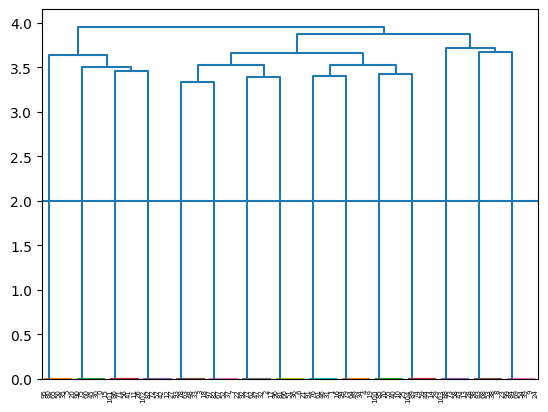

In [55]:
import scipy
from scipy.cluster import hierarchy
dendro=hierarchy.dendrogram(hierarchy.linkage(tfidf_vects.toarray(),method='ward'))
plt.axhline(y=2)

In [82]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward') 
Agg=cluster.fit_predict(tfidf_vects.toarray())

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [83]:
df['AVG-W2V Clus Label'] = cluster.labels_
df.head()

,document_id,clean_text,Sentiment,text_modified,review_tls,DBS Cluster Label,AVG-W2V Clus Label,Hierarchial Cluster Labels,AVG-W2V Word2Vec Label,cluster
0,0,entire movie looked like video game art budoka...,Neutral,entire movie looked like video game art budoka...,entire movie looked like video game art budoka...,-1,1,1,3,2
1,1,im dragon ball fan time ive watched back child...,Neutral,dragon ball fan time ive watched back childhoo...,dragon ball fan time ive watched back childhoo...,-1,2,2,5,2
2,2,ive seen movie cinema laugh much like humor mo...,Positive,ive seen movie cinema laugh much like humor mo...,ive seen movie cinema laugh much like humor mo...,-1,2,2,0,2
3,3,honest first really concerned cgianimation sin...,Positive,honest first really concerned cgianimation sin...,honest first really concerned cgianimation sin...,-1,2,2,4,2
4,4,dragon ball fan india delight watch theatre ma...,Positive,dragon ball fan india delight watch theatre ma...,dragon ball fan india delight watch theatre ma...,-1,2,2,8,1


In [84]:
hier_df = df
hier_df["Hierarchial Cluster Labels"] = cluster.labels_
hier_df.groupby(["Hierarchial Cluster Labels"])["review_tls"].count()

Hierarchial Cluster Labels
0    21
1    28
2    56
Name: review_tls, dtype: int64

In [85]:
silhouette_score_agg = metrics.silhouette_score(tfidf_vects.toarray(), cluster.labels_)
silhouette_score_agg

0.19396465184108225

4. Word2Vec

In [61]:
i=0
list_of_sent=[]
for sent in df['review_tls'].values:
    list_of_sent.append(sent.split())

import gensim
# Training the wor2vec model using train dataset
w2v_model=gensim.models.Word2Vec(list_of_sent,vector_size=100, workers=4)

In [62]:
import numpy as np
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this train
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(100) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
sent_vectors = np.array(sent_vectors)
sent_vectors = np.nan_to_num(sent_vectors)
sent_vectors.shape

(105, 100)

In [63]:
# Number of clusters to check.
num_clus = [x for x in range(3,11)]
num_clus

[3, 4, 5, 6, 7, 8, 9, 10]

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

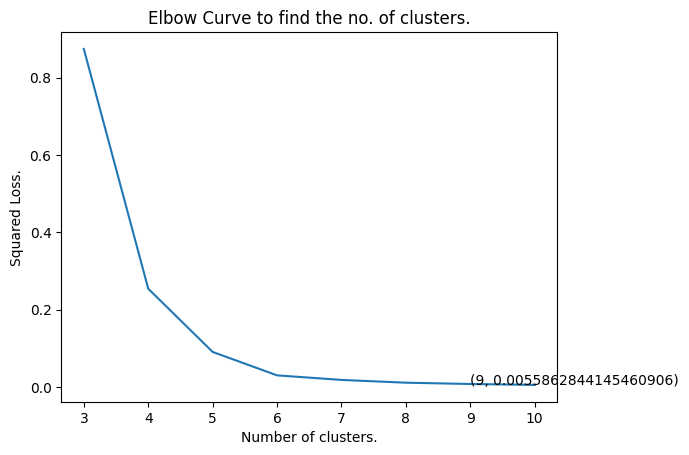

The optimal number of clusters obtained is -  9
The loss for optimal cluster is -  0.0055862844145460906


In [64]:
squared_errors = []
for cluster in num_clus:
    kmeans = KMeans(n_clusters = cluster).fit(sent_vectors) # Train Cluster
    squared_errors.append(kmeans.inertia_) # Appending the squared loss obtained in the list
    
optimal_clusters = np.argmin(squared_errors) + 2 # As argmin return the index of minimum loss. 
plt.plot(num_clus, squared_errors)
plt.title("Elbow Curve to find the no. of clusters.")
plt.xlabel("Number of clusters.")
plt.ylabel("Squared Loss.")
xy = (optimal_clusters, min(squared_errors))
plt.annotate('(%s, %s)' % xy, xy = xy, textcoords='data')
plt.show()

print ("The optimal number of clusters obtained is - ", optimal_clusters)
print ("The loss for optimal cluster is - ", min(squared_errors))

In [65]:
# Training the best model --
from sklearn.cluster import KMeans
model2 = KMeans(n_clusters = optimal_clusters)
model2.fit(sent_vectors)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=9)

In [66]:
word_cluster_pred=model2.predict(sent_vectors)
word_cluster_pred_2=model2.labels_
word_cluster_center=model2.cluster_centers_

In [67]:
# Giving Labels/assigning a cluster to each point/text 
dfa = df
dfa['AVG-W2V Word2Vec Label'] = model2.labels_
dfa.head(2)

,document_id,clean_text,Sentiment,text_modified,review_tls,DBS Cluster Label,AVG-W2V Clus Label,Hierarchial Cluster Labels,AVG-W2V Word2Vec Label
0,0,entire movie looked like video game art budoka...,Neutral,entire movie looked like video game art budoka...,entire movie looked like video game art budoka...,-1,1,1,3
1,1,im dragon ball fan time ive watched back child...,Neutral,dragon ball fan time ive watched back childhoo...,dragon ball fan time ive watched back childhoo...,-1,2,2,5


In [68]:
silhouette_score_w2v = metrics.silhouette_score(sent_vectors, word_cluster_pred_2, metric='euclidean')
silhouette_score_w2v

0.8173666849971096

5. Bert

In [69]:
%%capture
!pip install bertopic

In [72]:
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.cluster import KMeans

# Load BERT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained('bert-base-uncased')
model = AutoModel.from_pretrained('bert-base-uncased')

# Load text data
text_data = df['review_tls'].tolist()

# Tokenize text data and generate BERT embeddings
embeddings = []
for text in text_data:
    input_ids = torch.tensor(tokenizer.encode(text, add_special_tokens=True)).unsqueeze(0)
    outputs = model(input_ids)
    last_hidden_states = outputs[0][:, 0, :].detach().numpy()
    embeddings.append(last_hidden_states)
embeddings = np.concatenate(embeddings, axis=0)

# Cluster BERT embeddings using KMeans
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(embeddings)


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. S

In [74]:
# Assign cluster labels to text data
df['cluster'] = kmeans.labels_

# Print the number of texts in each cluster
print(df['cluster'].value_counts())

2    49
1    28
0    14
3     7
4     7
Name: cluster, dtype: int64


In [76]:
silhouette_score_bert = metrics.silhouette_score(embeddings, kmeans.labels_, metric='euclidean')
silhouette_score_bert

0.37301257

In one paragraph, please compare the results of K-means, DBSCAN, Hierarchical clustering, Word2Vec, and BERT.

In [ ]:
#You can write you answer here. (No code needed)
"""
K-means clustering is based on the distance between the data points and the centroids of the clusters themselves. DBSCAN is
used to perform clustering that is based on density. Here the areas where the points are concetrated the most are found and are segregated 
from empty space. Hierarchical clustering, as the name suggests involves clustering in layers. It begins with considering each data point 
as a seperate cluster and then finds the two clusters that are closer to each other. Word2Vec is based on first converting the list of sentences
to words and then into a count or frequency vector and once it trained, it can detect synonymous words or suggest additional words for a partial
sentence. BERT stands for bi directional encoder, in this model, every output element is connected to every input element and weights are 
calculated dynamically. Based on the results, by comparing over silhouette score, we can see that, word2vec has the highest score, which is 0.817,
A score of 1 denotes the best, meaning that the data point is very compact within the cluster to which it belongs and far away from the other
clusters
"""
